In [1]:
import pandas as pd
import numpy as np

# Hilal Web Data

### 1.Data Cleaning & Integration

In [2]:
df_data= pd.read_csv("hilal_sales_data.csv")
df_data

,Title_property,Location_property,Bedrooms,Bathrooms,Garage,Price,Size,Listing_Type
0,3-BEDROOM APARTMENT,Bausher,3.0,NaN,SHADED,45000,NaN,For Sale
1,3-BEDROOM VILLA,Al Mawaleh,4.0,NaN,SHADED,290000,NaN,For Sale
2,6-BEDROOM TWIN VILLA,Bausher,7.0,NaN,SHADED,180000,NaN,For Sale
3,7-BEDROOM DETACHED VILLA,Al Ansab,9.0,NaN,SHADED,300000,758.00,For Sale
4,4-BEDROOM DETACHED VILLA,Al Hail,6.0,NaN,SHADED,80000,NaN,For Sale
...,...,...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9.0,NaN,SHADED OUTSIDE,300000,NaN,For Sale
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3.0,NaN,UNSHADED,80000,199.00,For Sale
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8.0,NaN,4,-320000,670.00,For Sale
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8.0,NaN,1,85000,NaN,For Sale


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title_property     63 non-null     object 
 1   Location_property  61 non-null     object 
 2   Bedrooms           55 non-null     float64
 3   Bathrooms          0 non-null      float64
 4   Garage             48 non-null     object 
 5   Price              63 non-null     int64  
 6   Size               47 non-null     float64
 7   Listing_Type       63 non-null     object 
dtypes: float64(3), int64(1), object(4)
memory usage: 4.1+ KB


In [4]:
df_data.dtypes

Title_property        object
Location_property     object
Bedrooms             float64
Bathrooms            float64
Garage                object
Price                  int64
Size                 float64
Listing_Type          object
dtype: object

In [5]:
df_data.drop('Bathrooms', axis=1, inplace=True)

In [6]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Bedrooms,55.0,5.981818,2.112493,1.0,5.0,6.0,7.5,9.0
Price,63.0,125726.190476,101949.249715,-320000.0,80000.0,110000.0,182500.0,350000.0
Size,47.0,754.007447,1513.593972,18.8,270.0,334.0,597.5,7502.0


In [7]:
df_data[['Title_property', 'Location_property', 'Garage','Listing_Type']].describe().T

,count,unique,top,freq
Title_property,63,59,7-BEDROOM DETACHED VILLA,2
Location_property,61,17,Bausher,11
Garage,48,9,2,23
Listing_Type,63,2,For Sale,60


In [8]:
print("NaNs:", df_data["Bedrooms"].isna().sum())

NaNs: 8


In [9]:
print("Inf:", np.isinf(df_data["Bedrooms"]).sum())

Inf: 0


In [10]:
print("Unique values:", df_data["Bedrooms"].unique())

Unique values: [ 3.  4.  7.  9.  6.  8.  5. nan  2.  1.]


In [11]:
df_data["Bedrooms"] = pd.to_numeric(df_data["Bedrooms"], errors="coerce")

In [12]:
mode_value = df_data["Bedrooms"].mode()[0]
df_data["Bedrooms"] = df_data["Bedrooms"].fillna(mode_value)

In [13]:
print("NaNs after fill:", df_data["Bedrooms"].isna().sum())

NaNs after fill: 0


In [14]:
df_data["Bedrooms"] = df_data["Bedrooms"].astype(int)

In [15]:
df_data.columns

Index(['Title_property', 'Location_property', 'Bedrooms', 'Garage', 'Price',
       'Size', 'Listing_Type'],
      dtype='object')

In [16]:
df_data.dtypes

Title_property        object
Location_property     object
Bedrooms               int64
Garage                object
Price                  int64
Size                 float64
Listing_Type          object
dtype: object

In [17]:
df_data

,Title_property,Location_property,Bedrooms,Garage,Price,Size,Listing_Type
0,3-BEDROOM APARTMENT,Bausher,3,SHADED,45000,NaN,For Sale
1,3-BEDROOM VILLA,Al Mawaleh,4,SHADED,290000,NaN,For Sale
2,6-BEDROOM TWIN VILLA,Bausher,7,SHADED,180000,NaN,For Sale
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,SHADED,300000,758.00,For Sale
4,4-BEDROOM DETACHED VILLA,Al Hail,6,SHADED,80000,NaN,For Sale
...,...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9,SHADED OUTSIDE,300000,NaN,For Sale
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3,UNSHADED,80000,199.00,For Sale
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8,4,-320000,670.00,For Sale
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8,1,85000,NaN,For Sale


In [18]:
print("NaNs:", df_data["Price"].isna().sum())

NaNs: 0


In [19]:
df_data['Price'] = df_data['Price'].astype(str)

In [20]:
df_data.dtypes

Title_property        object
Location_property     object
Bedrooms               int64
Garage                object
Price                 object
Size                 float64
Listing_Type          object
dtype: object

In [21]:
# Step 2: Remove 'OMR', extra dashes, and whitespace
df_data['Price'] = df_data['Price'].str.replace('OMR', '', case=False)

In [22]:
df_data['Price'] = df_data['Price'].str.replace(',', '')  # just in case there are commas

In [23]:
df_data['Price'] = df_data['Price'].str.replace(r'^-', '', regex=True)  # remove leading dash

In [24]:
df_data['Price'] = df_data['Price'].str.strip()

In [25]:
df_data['Price'] = df_data['Price'].astype(int)

In [26]:
df_data.dtypes

Title_property        object
Location_property     object
Bedrooms               int64
Garage                object
Price                  int64
Size                 float64
Listing_Type          object
dtype: object

In [27]:
df_data

,Title_property,Location_property,Bedrooms,Garage,Price,Size,Listing_Type
0,3-BEDROOM APARTMENT,Bausher,3,SHADED,45000,NaN,For Sale
1,3-BEDROOM VILLA,Al Mawaleh,4,SHADED,290000,NaN,For Sale
2,6-BEDROOM TWIN VILLA,Bausher,7,SHADED,180000,NaN,For Sale
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,SHADED,300000,758.00,For Sale
4,4-BEDROOM DETACHED VILLA,Al Hail,6,SHADED,80000,NaN,For Sale
...,...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9,SHADED OUTSIDE,300000,NaN,For Sale
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3,UNSHADED,80000,199.00,For Sale
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8,4,320000,670.00,For Sale
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8,1,85000,NaN,For Sale


In [28]:
print(df_data['Garage'].value_counts(dropna=False))

Garage
2                 23
NaN               15
SHADED            11
3                  4
OUTSIDE            3
UNSHADED           2
1                  2
yes                1
SHADED OUTSIDE     1
4                  1
Name: count, dtype: int64


In [29]:
df_data

,Title_property,Location_property,Bedrooms,Garage,Price,Size,Listing_Type
0,3-BEDROOM APARTMENT,Bausher,3,SHADED,45000,NaN,For Sale
1,3-BEDROOM VILLA,Al Mawaleh,4,SHADED,290000,NaN,For Sale
2,6-BEDROOM TWIN VILLA,Bausher,7,SHADED,180000,NaN,For Sale
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,SHADED,300000,758.00,For Sale
4,4-BEDROOM DETACHED VILLA,Al Hail,6,SHADED,80000,NaN,For Sale
...,...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9,SHADED OUTSIDE,300000,NaN,For Sale
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3,UNSHADED,80000,199.00,For Sale
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8,4,320000,670.00,For Sale
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8,1,85000,NaN,For Sale


In [30]:
df_data.drop('Garage', axis=1, inplace=True)

In [31]:
df_data

,Title_property,Location_property,Bedrooms,Price,Size,Listing_Type
0,3-BEDROOM APARTMENT,Bausher,3,45000,NaN,For Sale
1,3-BEDROOM VILLA,Al Mawaleh,4,290000,NaN,For Sale
2,6-BEDROOM TWIN VILLA,Bausher,7,180000,NaN,For Sale
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,300000,758.00,For Sale
4,4-BEDROOM DETACHED VILLA,Al Hail,6,80000,NaN,For Sale
...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9,300000,NaN,For Sale
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3,80000,199.00,For Sale
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8,320000,670.00,For Sale
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8,85000,NaN,For Sale


In [32]:
df_data.dtypes

Title_property        object
Location_property     object
Bedrooms               int64
Price                  int64
Size                 float64
Listing_Type          object
dtype: object

In [33]:
df_data.duplicated().sum()

np.int64(0)

In [34]:
df_data.isnull().sum()

Title_property        0
Location_property     2
Bedrooms              0
Price                 0
Size                 16
Listing_Type          0
dtype: int64

In [35]:
print(df_data['Location_property'].unique())

['Bausher' 'Al Mawaleh' 'Al Ansab' 'Al Hail' nan 'Al Khoudh'
 'Shatti Al Qurum' 'Maabelah' 'Barka' 'Qurum' 'Madinat Qaboos (MQ)'
 'Mutrah' 'Muscat Hills' 'Rusayl' 'Al Ghoubrah' 'MUSCAT BAY' 'Al Khuwair'
 'Salalah']


In [36]:
df_data['Location_property'] = df_data['Location_property'].astype(str).str.strip()

In [37]:
df_data['Location_property'] = df_data['Location_property'].replace(['', 'nan', 'NaN', 'None'], np.nan)

In [38]:
df_data = df_data.dropna(subset=['Location_property'])

In [39]:
print(df_data['Location_property'].isnull().sum())  # this must be 0 after the drop

0


In [40]:
df_data

,Title_property,Location_property,Bedrooms,Price,Size,Listing_Type
0,3-BEDROOM APARTMENT,Bausher,3,45000,NaN,For Sale
1,3-BEDROOM VILLA,Al Mawaleh,4,290000,NaN,For Sale
2,6-BEDROOM TWIN VILLA,Bausher,7,180000,NaN,For Sale
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,300000,758.00,For Sale
4,4-BEDROOM DETACHED VILLA,Al Hail,6,80000,NaN,For Sale
...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9,300000,NaN,For Sale
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3,80000,199.00,For Sale
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8,320000,670.00,For Sale
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8,85000,NaN,For Sale


In [41]:
df_data.head(50)

,Title_property,Location_property,Bedrooms,Price,Size,Listing_Type
0,3-BEDROOM APARTMENT,Bausher,3,45000,NaN,For Sale
1,3-BEDROOM VILLA,Al Mawaleh,4,290000,NaN,For Sale
2,6-BEDROOM TWIN VILLA,Bausher,7,180000,NaN,For Sale
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,300000,758.0,For Sale
4,4-BEDROOM DETACHED VILLA,Al Hail,6,80000,NaN,For Sale
5,5-BEDROOM TWIN VILLA,Al Ansab,7,700,NaN,"For Rent, For Sale"
7,6+1 BEDROOM DETACHED VILLA,Bausher,7,180,NaN,For Sale
8,4+1 BEDROOM COMPOUND VILLA,Al Khoudh,5,80000,260.0,For Sale
9,7-BEDROOM DETACHED VILLA,Al Ansab,9,220,NaN,For Sale
10,4+1 TWIN VILLA,Shatti Al Qurum,5,1000,NaN,"For Rent, For Sale"


In [42]:
print(df_data['Size'].isnull().sum())

16


In [43]:
fill_size = df_data['Size'].median()
df_data['Size'] = df_data['Size'].fillna(fill_size)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_18172\3275565012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Size'] = df_data['Size'].fillna(fill_size)


In [44]:
print(df_data['Size'].isnull().sum())  # should be 0

0


In [45]:
df_data

,Title_property,Location_property,Bedrooms,Price,Size,Listing_Type
0,3-BEDROOM APARTMENT,Bausher,3,45000,334.00,For Sale
1,3-BEDROOM VILLA,Al Mawaleh,4,290000,334.00,For Sale
2,6-BEDROOM TWIN VILLA,Bausher,7,180000,334.00,For Sale
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,300000,758.00,For Sale
4,4-BEDROOM DETACHED VILLA,Al Hail,6,80000,334.00,For Sale
...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9,300000,334.00,For Sale
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3,80000,199.00,For Sale
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8,320000,670.00,For Sale
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8,85000,334.00,For Sale


<Axes: xlabel='Size'>

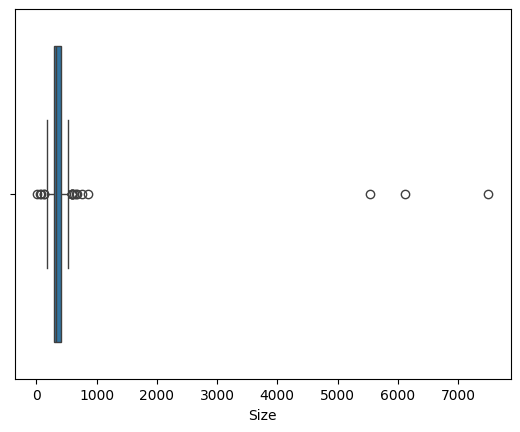

In [46]:
import seaborn as sns
sns.boxplot(x=df_data['Size'])

In [47]:
Q1 = df_data['Size'].quantile(0.25)
Q3 = df_data['Size'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_data[(df_data['Size'] < lower_bound) | (df_data['Size'] > upper_bound)]
print(f"Number of outliers in Size: {len(outliers)}")

Number of outliers in Size: 18


In [48]:
df_data['Size_capped'] = df_data['Size'].clip(lower=lower_bound, upper=upper_bound)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_18172\4083921059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Size_capped'] = df_data['Size'].clip(lower=lower_bound, upper=upper_bound)


<Axes: xlabel='Size_capped'>

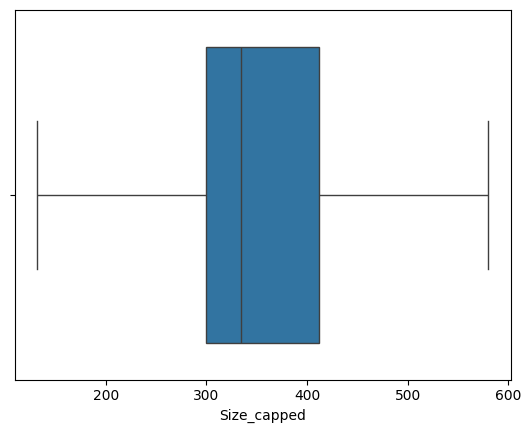

In [49]:
sns.boxplot(x=df_data['Size_capped'])

In [50]:
df_data

,Title_property,Location_property,Bedrooms,Price,Size,Listing_Type,Size_capped
0,3-BEDROOM APARTMENT,Bausher,3,45000,334.00,For Sale,334.0
1,3-BEDROOM VILLA,Al Mawaleh,4,290000,334.00,For Sale,334.0
2,6-BEDROOM TWIN VILLA,Bausher,7,180000,334.00,For Sale,334.0
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,300000,758.00,For Sale,580.0
4,4-BEDROOM DETACHED VILLA,Al Hail,6,80000,334.00,For Sale,334.0
...,...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9,300000,334.00,For Sale,334.0
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3,80000,199.00,For Sale,199.0
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8,320000,670.00,For Sale,580.0
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8,85000,334.00,For Sale,334.0


In [51]:
df_data.rename(columns={'Size_capped': 'Area'}, inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_18172\3305334523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.rename(columns={'Size_capped': 'Area'}, inplace=True)


In [52]:
df_data

,Title_property,Location_property,Bedrooms,Price,Size,Listing_Type,Area
0,3-BEDROOM APARTMENT,Bausher,3,45000,334.00,For Sale,334.0
1,3-BEDROOM VILLA,Al Mawaleh,4,290000,334.00,For Sale,334.0
2,6-BEDROOM TWIN VILLA,Bausher,7,180000,334.00,For Sale,334.0
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,300000,758.00,For Sale,580.0
4,4-BEDROOM DETACHED VILLA,Al Hail,6,80000,334.00,For Sale,334.0
...,...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9,300000,334.00,For Sale,334.0
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3,80000,199.00,For Sale,199.0
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8,320000,670.00,For Sale,580.0
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8,85000,334.00,For Sale,334.0


In [53]:
df_data.drop('Size', axis=1, inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_18172\3031187966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.drop('Size', axis=1, inplace=True)


In [54]:
df_data

,Title_property,Location_property,Bedrooms,Price,Listing_Type,Area
0,3-BEDROOM APARTMENT,Bausher,3,45000,For Sale,334.0
1,3-BEDROOM VILLA,Al Mawaleh,4,290000,For Sale,334.0
2,6-BEDROOM TWIN VILLA,Bausher,7,180000,For Sale,334.0
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,300000,For Sale,580.0
4,4-BEDROOM DETACHED VILLA,Al Hail,6,80000,For Sale,334.0
...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9,300000,For Sale,334.0
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3,80000,For Sale,199.0
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8,320000,For Sale,580.0
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8,85000,For Sale,334.0


In [55]:
df_data.rename(columns={'Bedrooms': 'number_of_rooms'}, inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_18172\402416962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.rename(columns={'Bedrooms': 'number_of_rooms'}, inplace=True)


In [56]:
df_data

,Title_property,Location_property,number_of_rooms,Price,Listing_Type,Area
0,3-BEDROOM APARTMENT,Bausher,3,45000,For Sale,334.0
1,3-BEDROOM VILLA,Al Mawaleh,4,290000,For Sale,334.0
2,6-BEDROOM TWIN VILLA,Bausher,7,180000,For Sale,334.0
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,300000,For Sale,580.0
4,4-BEDROOM DETACHED VILLA,Al Hail,6,80000,For Sale,334.0
...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9,300000,For Sale,334.0
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3,80000,For Sale,199.0
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8,320000,For Sale,580.0
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8,85000,For Sale,334.0


In [57]:
df_data.rename(columns={'Title_property': 'property_title','Location_property':'location'}, inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_18172\699845550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.rename(columns={'Title_property': 'property_title','Location_property':'location'}, inplace=True)


In [58]:
df_data

,property_title,location,number_of_rooms,Price,Listing_Type,Area
0,3-BEDROOM APARTMENT,Bausher,3,45000,For Sale,334.0
1,3-BEDROOM VILLA,Al Mawaleh,4,290000,For Sale,334.0
2,6-BEDROOM TWIN VILLA,Bausher,7,180000,For Sale,334.0
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,300000,For Sale,580.0
4,4-BEDROOM DETACHED VILLA,Al Hail,6,80000,For Sale,334.0
...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9,300000,For Sale,334.0
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3,80000,For Sale,199.0
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8,320000,For Sale,580.0
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8,85000,For Sale,334.0


# 2. Feature Engineering

find the unique values for the listing type

In [59]:
df_data['Listing_Type'].unique()  

array(['For Sale', 'For Rent, For Sale'], dtype=object)

create 2 columns from the listing type which is for sale and for rent

In [60]:
df_data['For_Sale'] = df_data['Listing_Type'].apply(lambda x: 1 if 'For Sale' in x else 0)
df_data['For_Rent'] = df_data['Listing_Type'].apply(lambda x: 1 if 'For Rent' in x else 0)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_18172\3917985615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['For_Sale'] = df_data['Listing_Type'].apply(lambda x: 1 if 'For Sale' in x else 0)
C:\Users\bbuser\AppData\Local\Temp\ipykernel_18172\3917985615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['For_Rent'] = df_data['Listing_Type'].apply(lambda x: 1 if 'For Rent' in x else 0)


In [61]:
df_data

,property_title,location,number_of_rooms,Price,Listing_Type,Area,For_Sale,For_Rent
0,3-BEDROOM APARTMENT,Bausher,3,45000,For Sale,334.0,1,0
1,3-BEDROOM VILLA,Al Mawaleh,4,290000,For Sale,334.0,1,0
2,6-BEDROOM TWIN VILLA,Bausher,7,180000,For Sale,334.0,1,0
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,300000,For Sale,580.0,1,0
4,4-BEDROOM DETACHED VILLA,Al Hail,6,80000,For Sale,334.0,1,0
...,...,...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9,300000,For Sale,334.0,1,0
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3,80000,For Sale,199.0,1,0
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8,320000,For Sale,580.0,1,0
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8,85000,For Sale,334.0,1,0


In [62]:
df_data.rename(columns={'Price': 'Price_OMR'}, inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_18172\1096115507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.rename(columns={'Price': 'Price_OMR'}, inplace=True)


In [63]:
df_data

,property_title,location,number_of_rooms,Price_OMR,Listing_Type,Area,For_Sale,For_Rent
0,3-BEDROOM APARTMENT,Bausher,3,45000,For Sale,334.0,1,0
1,3-BEDROOM VILLA,Al Mawaleh,4,290000,For Sale,334.0,1,0
2,6-BEDROOM TWIN VILLA,Bausher,7,180000,For Sale,334.0,1,0
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,300000,For Sale,580.0,1,0
4,4-BEDROOM DETACHED VILLA,Al Hail,6,80000,For Sale,334.0,1,0
...,...,...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9,300000,For Sale,334.0,1,0
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3,80000,For Sale,199.0,1,0
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8,320000,For Sale,580.0,1,0
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8,85000,For Sale,334.0,1,0


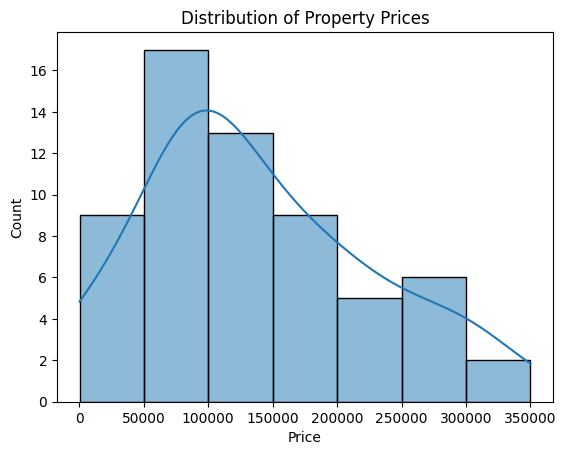

In [64]:
import matplotlib.pyplot as plt
sns.histplot(df_data['Price_OMR'], kde=True)  #note: the kde here is used to know the propability of distribution
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [65]:
df_data['price_per_sqm'] = df_data['Price_OMR'] / df_data['Area']

C:\Users\bbuser\AppData\Local\Temp\ipykernel_18172\395025257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['price_per_sqm'] = df_data['Price_OMR'] / df_data['Area']


In [66]:
df_data

,property_title,location,number_of_rooms,Price_OMR,Listing_Type,Area,For_Sale,For_Rent,price_per_sqm
0,3-BEDROOM APARTMENT,Bausher,3,45000,For Sale,334.0,1,0,134.730539
1,3-BEDROOM VILLA,Al Mawaleh,4,290000,For Sale,334.0,1,0,868.263473
2,6-BEDROOM TWIN VILLA,Bausher,7,180000,For Sale,334.0,1,0,538.922156
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,300000,For Sale,580.0,1,0,517.241379
4,4-BEDROOM DETACHED VILLA,Al Hail,6,80000,For Sale,334.0,1,0,239.520958
...,...,...,...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9,300000,For Sale,334.0,1,0,898.203593
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3,80000,For Sale,199.0,1,0,402.010050
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8,320000,For Sale,580.0,1,0,551.724138
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8,85000,For Sale,334.0,1,0,254.491018


In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_columns = ['Price_OMR', 'Area', 'price_per_sqm']

df_data[numeric_columns] = scaler.fit_transform(df_data[numeric_columns])

C:\Users\bbuser\AppData\Local\Temp\ipykernel_18172\2475377458.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data[numeric_columns] = scaler.fit_transform(df_data[numeric_columns])


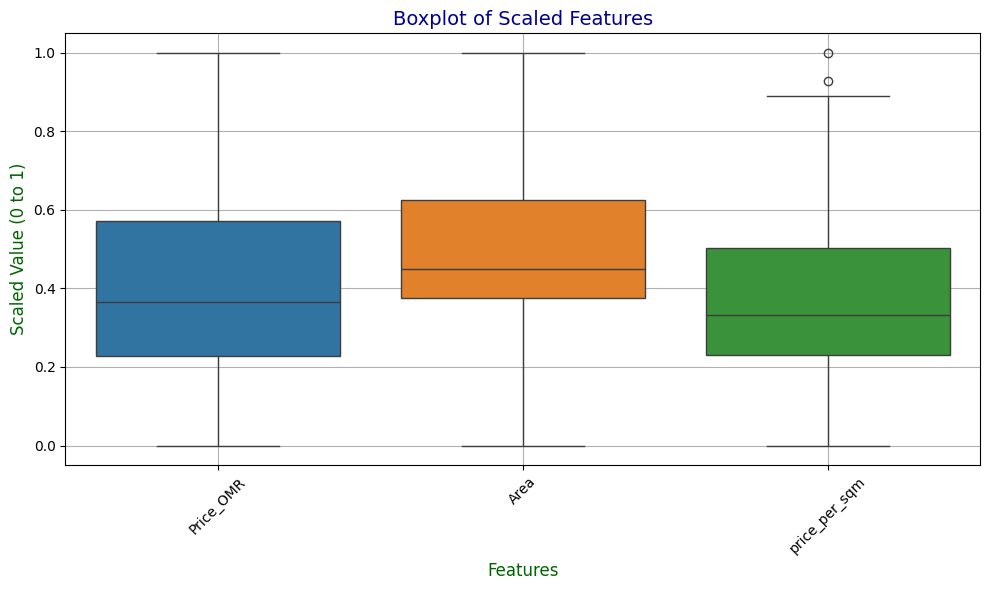

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_data[['Price_OMR', 'Area', 'price_per_sqm']])
plt.title('Boxplot of Scaled Features', fontsize=14, color='darkblue')
plt.xlabel('Features', fontsize=12, color='darkgreen')
plt.ylabel('Scaled Value (0 to 1)', fontsize=12, color='darkgreen')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
df_data

,property_title,location,number_of_rooms,Price_OMR,Listing_Type,Area,For_Sale,For_Rent,price_per_sqm
0,3-BEDROOM APARTMENT,Bausher,3,0.128123,For Sale,0.450893,1,0,0.128123
1,3-BEDROOM VILLA,Al Mawaleh,4,0.828483,For Sale,0.450893,1,0,0.828483
2,6-BEDROOM TWIN VILLA,Bausher,7,0.514036,For Sale,0.450893,1,0,0.514036
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,0.857069,For Sale,1.000000,1,0,0.493335
4,4-BEDROOM DETACHED VILLA,Al Hail,6,0.228174,For Sale,0.450893,1,0,0.228174
...,...,...,...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9,0.857069,For Sale,0.450893,1,0,0.857069
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3,0.228174,For Sale,0.149554,1,0,0.383315
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8,0.914242,For Sale,1.000000,1,0,0.526259
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8,0.242468,For Sale,0.450893,1,0,0.242468


# dubizzle web preprocess

### 1. Data Cleaning & Integration

In [70]:
df_process_dub= pd.read_csv("dubizzle_properties_for_sale.csv")
df_process_dub

,property_name,sale_price,location,area,bathrooms,beds
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,"OMR 46,000Negotiable","Ghala, Muscat•",102 SQM,3,2
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,"OMR 87,000Freehold","Yiti, Muscat•",79 SQM,2,1
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,"OMR 249,000Freehold","Salalah, Dhofar•",573 SQM,3,3
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,"OMR 125,000Freehold","The Wave (Almouj), Muscat•",110 SQM,2,1
4,5 BR Spacious Villa in Azaiba Nearby Amenities,"OMR 197,000Non Freehold","Azaiba, Muscat•",600 SQM,4,5
...,...,...,...,...,...,...
4656,منزل طابقين للبيع بمنطقة روي,"OMR 90,000Non Freehold","Ruwi, Muscat•",167 SQM,Not specified,Not specified
4657,أرض الطيب موقع جميل,"OMR 2,200","Ibri, Al Dhahirah•",600 SQM,Not specified,Not specified
4658,all types of interlock avaialble watsapp me 95...,"OMR 2,000Negotiable","Al Rusayl, Muscat•",10 SQM,Not specified,Not specified
4659,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"OMR 31,000","Barka, Al Batinah•",600 SQM,Not specified,Not specified


get the info about the columns , non-null count , the dataypes and the memory

In [71]:
df_process_dub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4661 entries, 0 to 4660
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_name  4661 non-null   object
 1   sale_price     4661 non-null   object
 2   location       4661 non-null   object
 3   area           4661 non-null   object
 4   bathrooms      4661 non-null   object
 5   beds           4661 non-null   object
dtypes: object(6)
memory usage: 218.6+ KB


know the names of the columns

In [72]:
df_process_dub.columns

Index(['property_name', 'sale_price', 'location', 'area', 'bathrooms', 'beds'], dtype='object')

the data type of each col--< helps to see if need to convert some col or not

In [73]:
df_process_dub.dtypes

property_name    object
sale_price       object
location         object
area             object
bathrooms        object
beds             object
dtype: object

need to drop the bathrooms since it is not needed

In [74]:
df_process_dub.drop('bathrooms', axis=1, inplace=True)

In [75]:
df_process_dub

,property_name,sale_price,location,area,beds
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,"OMR 46,000Negotiable","Ghala, Muscat•",102 SQM,2
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,"OMR 87,000Freehold","Yiti, Muscat•",79 SQM,1
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,"OMR 249,000Freehold","Salalah, Dhofar•",573 SQM,3
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,"OMR 125,000Freehold","The Wave (Almouj), Muscat•",110 SQM,1
4,5 BR Spacious Villa in Azaiba Nearby Amenities,"OMR 197,000Non Freehold","Azaiba, Muscat•",600 SQM,5
...,...,...,...,...,...
4656,منزل طابقين للبيع بمنطقة روي,"OMR 90,000Non Freehold","Ruwi, Muscat•",167 SQM,Not specified
4657,أرض الطيب موقع جميل,"OMR 2,200","Ibri, Al Dhahirah•",600 SQM,Not specified
4658,all types of interlock avaialble watsapp me 95...,"OMR 2,000Negotiable","Al Rusayl, Muscat•",10 SQM,Not specified
4659,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"OMR 31,000","Barka, Al Batinah•",600 SQM,Not specified


to know the unique values

In [76]:
df_process_dub['area'].unique()

array(['102 SQM', '79 SQM', '573 SQM', ..., '790 SQM', '1,213 SQM',
       '120.55 SQM'], shape=(1154,), dtype=object)

In [77]:
df_process_dub['beds'].unique()

array(['2', '1', '3', '5', '6', 'Not specified', '9', '4', '7', 'Studio',
       '8', '12', '10', '11'], dtype=object)

for the sale price it is an object so we need to coneverted but before that i have to reomve the unwanted strings from it 

In [78]:
df_process_dub['sale_price'] = df_process_dub['sale_price'].str.replace(r'OMR|\s|,|Negotiable|Freehold|Non Freehold', '', regex=True)
df_process_dub['sale_price'] = pd.to_numeric(df_process_dub['sale_price'], errors='coerce')

In [79]:
df_process_dub

,property_name,sale_price,location,area,beds
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,46000.0,"Ghala, Muscat•",102 SQM,2
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,87000.0,"Yiti, Muscat•",79 SQM,1
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,249000.0,"Salalah, Dhofar•",573 SQM,3
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,125000.0,"The Wave (Almouj), Muscat•",110 SQM,1
4,5 BR Spacious Villa in Azaiba Nearby Amenities,197000.0,"Azaiba, Muscat•",600 SQM,5
...,...,...,...,...,...
4656,منزل طابقين للبيع بمنطقة روي,90000.0,"Ruwi, Muscat•",167 SQM,Not specified
4657,أرض الطيب موقع جميل,2200.0,"Ibri, Al Dhahirah•",600 SQM,Not specified
4658,all types of interlock avaialble watsapp me 95...,2000.0,"Al Rusayl, Muscat•",10 SQM,Not specified
4659,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,31000.0,"Barka, Al Batinah•",600 SQM,Not specified


In [80]:
df_process_dub.dtypes

property_name     object
sale_price       float64
location          object
area              object
beds              object
dtype: object

after checking from the price .. move to the next col which is the area need to remove the strings and then converted to numeric

In [81]:
df_process_dub['area'] = df_process_dub['area'].str.replace('SQM', '').str.strip()
df_process_dub['area'] = pd.to_numeric(df_process_dub['area'], errors='coerce')

In [82]:
df_process_dub.dtypes

property_name     object
sale_price       float64
location          object
area             float64
beds              object
dtype: object

for the location there is a dot we i need to replace it with empty

In [83]:
df_process_dub['location']= df_process_dub['location'].str.replace('•', '').str.strip()

for the location we have the city and the region so we need to splitted into 2 col

In [84]:
df_process_dub[['city', 'governorate']] = df_process_dub['location'].str.split(',', n=1, expand=True)
df_process_dub['city'] = df_process_dub['city'].str.strip()
df_process_dub['governorate'] = df_process_dub['governorate'].str.strip()

In [85]:
df_process_dub

,property_name,sale_price,location,area,beds,city,governorate
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,46000.0,"Ghala, Muscat",102.0,2,Ghala,Muscat
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,87000.0,"Yiti, Muscat",79.0,1,Yiti,Muscat
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,249000.0,"Salalah, Dhofar",573.0,3,Salalah,Dhofar
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,125000.0,"The Wave (Almouj), Muscat",110.0,1,The Wave (Almouj),Muscat
4,5 BR Spacious Villa in Azaiba Nearby Amenities,197000.0,"Azaiba, Muscat",600.0,5,Azaiba,Muscat
...,...,...,...,...,...,...,...
4656,منزل طابقين للبيع بمنطقة روي,90000.0,"Ruwi, Muscat",167.0,Not specified,Ruwi,Muscat
4657,أرض الطيب موقع جميل,2200.0,"Ibri, Al Dhahirah",600.0,Not specified,Ibri,Al Dhahirah
4658,all types of interlock avaialble watsapp me 95...,2000.0,"Al Rusayl, Muscat",10.0,Not specified,Al Rusayl,Muscat
4659,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,31000.0,"Barka, Al Batinah",600.0,Not specified,Barka,Al Batinah


In [86]:
df_process_dub.rename(columns={'sale_price': 'Price_Omr', 'area': 'Area_Sqm', 'beds': 'Bedrooms'}, inplace=True)

In [87]:
df_process_dub

,property_name,Price_Omr,location,Area_Sqm,Bedrooms,city,governorate
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,46000.0,"Ghala, Muscat",102.0,2,Ghala,Muscat
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,87000.0,"Yiti, Muscat",79.0,1,Yiti,Muscat
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,249000.0,"Salalah, Dhofar",573.0,3,Salalah,Dhofar
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,125000.0,"The Wave (Almouj), Muscat",110.0,1,The Wave (Almouj),Muscat
4,5 BR Spacious Villa in Azaiba Nearby Amenities,197000.0,"Azaiba, Muscat",600.0,5,Azaiba,Muscat
...,...,...,...,...,...,...,...
4656,منزل طابقين للبيع بمنطقة روي,90000.0,"Ruwi, Muscat",167.0,Not specified,Ruwi,Muscat
4657,أرض الطيب موقع جميل,2200.0,"Ibri, Al Dhahirah",600.0,Not specified,Ibri,Al Dhahirah
4658,all types of interlock avaialble watsapp me 95...,2000.0,"Al Rusayl, Muscat",10.0,Not specified,Al Rusayl,Muscat
4659,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,31000.0,"Barka, Al Batinah",600.0,Not specified,Barka,Al Batinah


In [88]:
df_process_dub.dtypes

property_name     object
Price_Omr        float64
location          object
Area_Sqm         float64
Bedrooms          object
city              object
governorate       object
dtype: object

In [89]:
df_process_dub.head(10)

,property_name,Price_Omr,location,Area_Sqm,Bedrooms,city,governorate
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,46000.0,"Ghala, Muscat",102.0,2,Ghala,Muscat
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,87000.0,"Yiti, Muscat",79.0,1,Yiti,Muscat
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,249000.0,"Salalah, Dhofar",573.0,3,Salalah,Dhofar
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,125000.0,"The Wave (Almouj), Muscat",110.0,1,The Wave (Almouj),Muscat
4,5 BR Spacious Villa in Azaiba Nearby Amenities,197000.0,"Azaiba, Muscat",600.0,5,Azaiba,Muscat
5,Exclusive Furnished 3-Bedroom Villa for Sale i...,254000.0,"Salalah, Dhofar",610.0,3,Salalah,Dhofar
6,ارخص فیلا قید الانشاء | تقسیط | موج مسقط | 5 غ...,573300.0,"The Wave (Almouj), Muscat",549.0,5,The Wave (Almouj),Muscat
7,"Luxury Sea View Apartment for Sale – Juman 2, ...",215000.0,"The Wave (Almouj), Muscat",145.0,2,The Wave (Almouj),Muscat
8,3 + 1 Fully Furnished Villa for Sale in Al Kho...,150000.0,"Al Khoud, Muscat",768.0,3,Al Khoud,Muscat
9,‎فيلا جديده راقيه للبيع في المعبيلة الثالثة,120000.0,"Al Maabilah, Muscat",408.0,6,Al Maabilah,Muscat


check if the data has some duplicates

In [90]:
df_process_dub.duplicated().sum()

np.int64(378)

need to drop the duplicates

In [91]:
duplicated_rows = df_process_dub[df_process_dub.duplicated(keep=False)]
duplicated_rows

,property_name,Price_Omr,location,Area_Sqm,Bedrooms,city,governorate
5,Exclusive Furnished 3-Bedroom Villa for Sale i...,254000.0,"Salalah, Dhofar",610.0,3,Salalah,Dhofar
6,ارخص فیلا قید الانشاء | تقسیط | موج مسقط | 5 غ...,573300.0,"The Wave (Almouj), Muscat",549.0,5,The Wave (Almouj),Muscat
7,"Luxury Sea View Apartment for Sale – Juman 2, ...",215000.0,"The Wave (Almouj), Muscat",145.0,2,The Wave (Almouj),Muscat
8,3 + 1 Fully Furnished Villa for Sale in Al Kho...,150000.0,"Al Khoud, Muscat",768.0,3,Al Khoud,Muscat
9,‎فيلا جديده راقيه للبيع في المعبيلة الثالثة,120000.0,"Al Maabilah, Muscat",408.0,6,Al Maabilah,Muscat
...,...,...,...,...,...,...,...
4150,ارض تجاريه,15000.0,"Sohar, Al Batinah",300.0,Not specified,Sohar,Al Batinah
4186,ارض تجاريه,15000.0,"Sohar, Al Batinah",300.0,Not specified,Sohar,Al Batinah
4228,سعر الفلل قابل للتفاوض,64000.0,"Al Amarat, Muscat",300.0,6,Al Amarat,Muscat
4233,سعر الفلل قابل للتفاوض,64000.0,"Al Amarat, Muscat",300.0,6,Al Amarat,Muscat


In [92]:
df_process_dub.drop_duplicates()

,property_name,Price_Omr,location,Area_Sqm,Bedrooms,city,governorate
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,46000.0,"Ghala, Muscat",102.0,2,Ghala,Muscat
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,87000.0,"Yiti, Muscat",79.0,1,Yiti,Muscat
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,249000.0,"Salalah, Dhofar",573.0,3,Salalah,Dhofar
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,125000.0,"The Wave (Almouj), Muscat",110.0,1,The Wave (Almouj),Muscat
4,5 BR Spacious Villa in Azaiba Nearby Amenities,197000.0,"Azaiba, Muscat",600.0,5,Azaiba,Muscat
...,...,...,...,...,...,...,...
4656,منزل طابقين للبيع بمنطقة روي,90000.0,"Ruwi, Muscat",167.0,Not specified,Ruwi,Muscat
4657,أرض الطيب موقع جميل,2200.0,"Ibri, Al Dhahirah",600.0,Not specified,Ibri,Al Dhahirah
4658,all types of interlock avaialble watsapp me 95...,2000.0,"Al Rusayl, Muscat",10.0,Not specified,Al Rusayl,Muscat
4659,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,31000.0,"Barka, Al Batinah",600.0,Not specified,Barka,Al Batinah


after dealing with the dupliactes--> need to check the null values

In [93]:
df_process_dub.isnull().sum()

property_name      0
Price_Omr          0
location           0
Area_Sqm         546
Bedrooms           0
city               0
governorate        0
dtype: int64

In [94]:
df_process_dub[df_process_dub['Area_Sqm'].isna()].head()

,property_name,Price_Omr,location,Area_Sqm,Bedrooms,city,governorate
10,أرض للبيع خمس اراضي زراعية مساحة كل منهن 16800...,350000.0,"Barka, Al Batinah",NaN,Not specified,Barka,Al Batinah
12,ارض للبيع سكني تجاري في غلاء - Land for sale i...,500.0,"Ghala, Muscat",NaN,Not specified,Ghala,Muscat
14,الأرض للبيع مساحه ٢١٠٨ م,50000.0,"Barka, Al Batinah",NaN,Not specified,Barka,Al Batinah
25,أرض للبيع خمس اراضي زراعية مساحة كل منهن 16800...,350000.0,"Barka, Al Batinah",NaN,Not specified,Barka,Al Batinah
27,ارض للبيع سكني تجاري في غلاء - Land for sale i...,500.0,"Ghala, Muscat",NaN,Not specified,Ghala,Muscat


In [95]:
df_process_dub['Area_Sqm'] = df_process_dub.groupby('city')['Area_Sqm'].transform(lambda x: x.fillna(x.median()))

C:\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [96]:
df_process_dub

,property_name,Price_Omr,location,Area_Sqm,Bedrooms,city,governorate
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,46000.0,"Ghala, Muscat",102.0,2,Ghala,Muscat
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,87000.0,"Yiti, Muscat",79.0,1,Yiti,Muscat
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,249000.0,"Salalah, Dhofar",573.0,3,Salalah,Dhofar
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,125000.0,"The Wave (Almouj), Muscat",110.0,1,The Wave (Almouj),Muscat
4,5 BR Spacious Villa in Azaiba Nearby Amenities,197000.0,"Azaiba, Muscat",600.0,5,Azaiba,Muscat
...,...,...,...,...,...,...,...
4656,منزل طابقين للبيع بمنطقة روي,90000.0,"Ruwi, Muscat",167.0,Not specified,Ruwi,Muscat
4657,أرض الطيب موقع جميل,2200.0,"Ibri, Al Dhahirah",600.0,Not specified,Ibri,Al Dhahirah
4658,all types of interlock avaialble watsapp me 95...,2000.0,"Al Rusayl, Muscat",10.0,Not specified,Al Rusayl,Muscat
4659,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,31000.0,"Barka, Al Batinah",600.0,Not specified,Barka,Al Batinah


In [97]:
df_process_dub['Area_Sqm'].isna().sum()

np.int64(4)

In [98]:
df_process_dub['Area_Sqm'].fillna(df_process_dub['Area_Sqm'].median(), inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_18172\2203466334.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_process_dub['Area_Sqm'].fillna(df_process_dub['Area_Sqm'].median(), inplace=True)


In [99]:
df_process_dub

,property_name,Price_Omr,location,Area_Sqm,Bedrooms,city,governorate
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,46000.0,"Ghala, Muscat",102.0,2,Ghala,Muscat
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,87000.0,"Yiti, Muscat",79.0,1,Yiti,Muscat
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,249000.0,"Salalah, Dhofar",573.0,3,Salalah,Dhofar
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,125000.0,"The Wave (Almouj), Muscat",110.0,1,The Wave (Almouj),Muscat
4,5 BR Spacious Villa in Azaiba Nearby Amenities,197000.0,"Azaiba, Muscat",600.0,5,Azaiba,Muscat
...,...,...,...,...,...,...,...
4656,منزل طابقين للبيع بمنطقة روي,90000.0,"Ruwi, Muscat",167.0,Not specified,Ruwi,Muscat
4657,أرض الطيب موقع جميل,2200.0,"Ibri, Al Dhahirah",600.0,Not specified,Ibri,Al Dhahirah
4658,all types of interlock avaialble watsapp me 95...,2000.0,"Al Rusayl, Muscat",10.0,Not specified,Al Rusayl,Muscat
4659,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,31000.0,"Barka, Al Batinah",600.0,Not specified,Barka,Al Batinah


In [100]:
print(df_process_dub['Area_Sqm'].isna().sum())

0


In [101]:
df_process_dub[df_process_dub['Price_Omr'] < 0]

,property_name,Price_Omr,location,Area_Sqm,Bedrooms,city,governorate


In [102]:
df_process_dub[df_process_dub['Price_Omr'] > 0]

,property_name,Price_Omr,location,Area_Sqm,Bedrooms,city,governorate
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,46000.0,"Ghala, Muscat",102.0,2,Ghala,Muscat
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,87000.0,"Yiti, Muscat",79.0,1,Yiti,Muscat
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,249000.0,"Salalah, Dhofar",573.0,3,Salalah,Dhofar
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,125000.0,"The Wave (Almouj), Muscat",110.0,1,The Wave (Almouj),Muscat
4,5 BR Spacious Villa in Azaiba Nearby Amenities,197000.0,"Azaiba, Muscat",600.0,5,Azaiba,Muscat
...,...,...,...,...,...,...,...
4656,منزل طابقين للبيع بمنطقة روي,90000.0,"Ruwi, Muscat",167.0,Not specified,Ruwi,Muscat
4657,أرض الطيب موقع جميل,2200.0,"Ibri, Al Dhahirah",600.0,Not specified,Ibri,Al Dhahirah
4658,all types of interlock avaialble watsapp me 95...,2000.0,"Al Rusayl, Muscat",10.0,Not specified,Al Rusayl,Muscat
4659,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,31000.0,"Barka, Al Batinah",600.0,Not specified,Barka,Al Batinah


# 2. Feature Engineering

In [103]:
df_process_dub['price_per_sqm'] = df_process_dub['Price_Omr'] / df_process_dub['Area_Sqm']

In [104]:
df_process_dub

,property_name,Price_Omr,location,Area_Sqm,Bedrooms,city,governorate,price_per_sqm
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,46000.0,"Ghala, Muscat",102.0,2,Ghala,Muscat,450.980392
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,87000.0,"Yiti, Muscat",79.0,1,Yiti,Muscat,1101.265823
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,249000.0,"Salalah, Dhofar",573.0,3,Salalah,Dhofar,434.554974
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,125000.0,"The Wave (Almouj), Muscat",110.0,1,The Wave (Almouj),Muscat,1136.363636
4,5 BR Spacious Villa in Azaiba Nearby Amenities,197000.0,"Azaiba, Muscat",600.0,5,Azaiba,Muscat,328.333333
...,...,...,...,...,...,...,...,...
4656,منزل طابقين للبيع بمنطقة روي,90000.0,"Ruwi, Muscat",167.0,Not specified,Ruwi,Muscat,538.922156
4657,أرض الطيب موقع جميل,2200.0,"Ibri, Al Dhahirah",600.0,Not specified,Ibri,Al Dhahirah,3.666667
4658,all types of interlock avaialble watsapp me 95...,2000.0,"Al Rusayl, Muscat",10.0,Not specified,Al Rusayl,Muscat,200.000000
4659,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,31000.0,"Barka, Al Batinah",600.0,Not specified,Barka,Al Batinah,51.666667


In [105]:
df_process_dub['Bedrooms'] = df_process_dub['Bedrooms'].replace({'Not specified': np.nan, 'Studio': 0})

In [106]:
df_process_dub['Bedrooms'] = pd.to_numeric(df_process_dub['Bedrooms'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numuric_columns = ['Price_Omr', 'Area_Sqm', 'price_per_sqm', 'Bedrooms'] 

df_process_dub[numuric_columns] = scaler.fit_transform(df_process_dub[numuric_columns])

In [107]:
df_process_dub

,property_name,Price_Omr,location,Area_Sqm,Bedrooms,city,governorate,price_per_sqm
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,46000.0,"Ghala, Muscat",102.0,2.0,Ghala,Muscat,450.980392
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,87000.0,"Yiti, Muscat",79.0,1.0,Yiti,Muscat,1101.265823
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,249000.0,"Salalah, Dhofar",573.0,3.0,Salalah,Dhofar,434.554974
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,125000.0,"The Wave (Almouj), Muscat",110.0,1.0,The Wave (Almouj),Muscat,1136.363636
4,5 BR Spacious Villa in Azaiba Nearby Amenities,197000.0,"Azaiba, Muscat",600.0,5.0,Azaiba,Muscat,328.333333
...,...,...,...,...,...,...,...,...
4656,منزل طابقين للبيع بمنطقة روي,90000.0,"Ruwi, Muscat",167.0,NaN,Ruwi,Muscat,538.922156
4657,أرض الطيب موقع جميل,2200.0,"Ibri, Al Dhahirah",600.0,NaN,Ibri,Al Dhahirah,3.666667
4658,all types of interlock avaialble watsapp me 95...,2000.0,"Al Rusayl, Muscat",10.0,NaN,Al Rusayl,Muscat,200.000000
4659,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,31000.0,"Barka, Al Batinah",600.0,NaN,Barka,Al Batinah,51.666667


In [108]:
df_process_dub['Bedrooms'] = pd.to_numeric(df_process_dub['Bedrooms'], errors='coerce').astype('Int64')


In [109]:
df_process_dub.dtypes

property_name     object
Price_Omr        float64
location          object
Area_Sqm         float64
Bedrooms           Int64
city              object
governorate       object
price_per_sqm    float64
dtype: object

In [110]:
df_process_dub

,property_name,Price_Omr,location,Area_Sqm,Bedrooms,city,governorate,price_per_sqm
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,46000.0,"Ghala, Muscat",102.0,2,Ghala,Muscat,450.980392
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,87000.0,"Yiti, Muscat",79.0,1,Yiti,Muscat,1101.265823
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,249000.0,"Salalah, Dhofar",573.0,3,Salalah,Dhofar,434.554974
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,125000.0,"The Wave (Almouj), Muscat",110.0,1,The Wave (Almouj),Muscat,1136.363636
4,5 BR Spacious Villa in Azaiba Nearby Amenities,197000.0,"Azaiba, Muscat",600.0,5,Azaiba,Muscat,328.333333
...,...,...,...,...,...,...,...,...
4656,منزل طابقين للبيع بمنطقة روي,90000.0,"Ruwi, Muscat",167.0,<NA>,Ruwi,Muscat,538.922156
4657,أرض الطيب موقع جميل,2200.0,"Ibri, Al Dhahirah",600.0,<NA>,Ibri,Al Dhahirah,3.666667
4658,all types of interlock avaialble watsapp me 95...,2000.0,"Al Rusayl, Muscat",10.0,<NA>,Al Rusayl,Muscat,200.000000
4659,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,31000.0,"Barka, Al Batinah",600.0,<NA>,Barka,Al Batinah,51.666667


In [111]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_columns = ['Price_Omr', 'Area_Sqm', 'price_per_sqm']

df_process_dub[numeric_columns] = scaler.fit_transform(df_process_dub[numeric_columns])


In [112]:
df_process_dub[numeric_columns].head()

,Price_Omr,Area_Sqm,price_per_sqm
0,0.004599,0.101202,0.002039
1,0.008699,0.078156,0.004980
2,0.024899,0.573146,0.001965
3,0.012499,0.109218,0.005139
4,0.019699,0.600200,0.001485


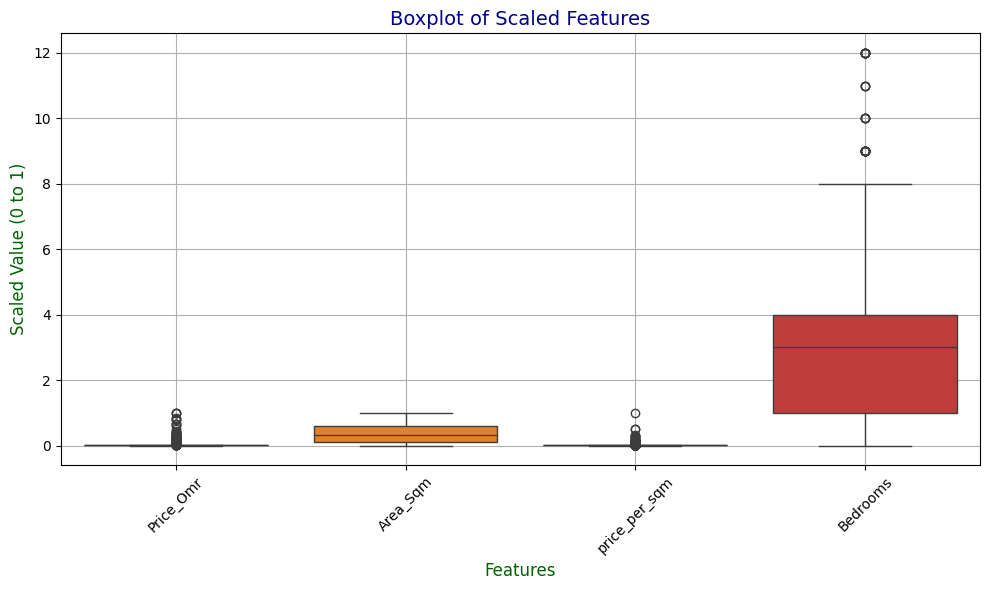

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_process_dub[['Price_Omr', 'Area_Sqm', 'price_per_sqm', 'Bedrooms']])
plt.title('Boxplot of Scaled Features', fontsize=14, color='darkblue')
plt.xlabel('Features', fontsize=12, color='darkgreen')
plt.ylabel('Scaled Value (0 to 1)', fontsize=12, color='darkgreen')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [114]:
# Detect outliers using IQR for each scaled feature
outliers = {}

for col in ['Price_Omr', 'Area_Sqm', 'price_per_sqm', 'Bedrooms']:
    Q1 = df_process_dub[col].quantile(0.25)
    Q3 = df_process_dub[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = ((df_process_dub[col] < lower_bound) | (df_process_dub[col] > upper_bound)).sum()

print("Number of outliers per feature:")
for key, value in outliers.items():
    print(f"{key}: {value}")


Number of outliers per feature:
Price_Omr: 471
Area_Sqm: 0
price_per_sqm: 225
Bedrooms: 32


In [115]:
df_process_dub.shape

(4661, 8)

In [116]:
print("NaNs:", df_process_dub["Bedrooms"].isna().sum())

NaNs: 2267


In [117]:
fill_beds = df_process_dub['Bedrooms'].median()
df_process_dub['Bedrooms'] = df_process_dub['Bedrooms'].fillna(fill_beds)

In [118]:
df_process_dub

,property_name,Price_Omr,location,Area_Sqm,Bedrooms,city,governorate,price_per_sqm
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,0.004599,"Ghala, Muscat",0.101202,2,Ghala,Muscat,0.002039
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,0.008699,"Yiti, Muscat",0.078156,1,Yiti,Muscat,0.004980
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,0.024899,"Salalah, Dhofar",0.573146,3,Salalah,Dhofar,0.001965
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,0.012499,"The Wave (Almouj), Muscat",0.109218,1,The Wave (Almouj),Muscat,0.005139
4,5 BR Spacious Villa in Azaiba Nearby Amenities,0.019699,"Azaiba, Muscat",0.600200,5,Azaiba,Muscat,0.001485
...,...,...,...,...,...,...,...,...
4656,منزل طابقين للبيع بمنطقة روي,0.008999,"Ruwi, Muscat",0.166333,3,Ruwi,Muscat,0.002437
4657,أرض الطيب موقع جميل,0.000219,"Ibri, Al Dhahirah",0.600200,3,Ibri,Al Dhahirah,0.000016
4658,all types of interlock avaialble watsapp me 95...,0.000199,"Al Rusayl, Muscat",0.009018,3,Al Rusayl,Muscat,0.000904
4659,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,0.003099,"Barka, Al Batinah",0.600200,3,Barka,Al Batinah,0.000233


In [119]:
print("NaNs:", df_process_dub["Bedrooms"].isna().sum())

NaNs: 0


In [120]:
df_process_dub.drop(['location', 'governorate'], axis=1, inplace=True)

In [121]:
df_process_dub

,property_name,Price_Omr,Area_Sqm,Bedrooms,city,price_per_sqm
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,0.004599,0.101202,2,Ghala,0.002039
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,0.008699,0.078156,1,Yiti,0.004980
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,0.024899,0.573146,3,Salalah,0.001965
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,0.012499,0.109218,1,The Wave (Almouj),0.005139
4,5 BR Spacious Villa in Azaiba Nearby Amenities,0.019699,0.600200,5,Azaiba,0.001485
...,...,...,...,...,...,...
4656,منزل طابقين للبيع بمنطقة روي,0.008999,0.166333,3,Ruwi,0.002437
4657,أرض الطيب موقع جميل,0.000219,0.600200,3,Ibri,0.000016
4658,all types of interlock avaialble watsapp me 95...,0.000199,0.009018,3,Al Rusayl,0.000904
4659,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,0.003099,0.600200,3,Barka,0.000233


In [122]:
df_process_dub.rename(columns={'city': 'location'}, inplace=True)

In [123]:
df_process_dub

,property_name,Price_Omr,Area_Sqm,Bedrooms,location,price_per_sqm
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,0.004599,0.101202,2,Ghala,0.002039
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,0.008699,0.078156,1,Yiti,0.004980
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,0.024899,0.573146,3,Salalah,0.001965
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,0.012499,0.109218,1,The Wave (Almouj),0.005139
4,5 BR Spacious Villa in Azaiba Nearby Amenities,0.019699,0.600200,5,Azaiba,0.001485
...,...,...,...,...,...,...
4656,منزل طابقين للبيع بمنطقة روي,0.008999,0.166333,3,Ruwi,0.002437
4657,أرض الطيب موقع جميل,0.000219,0.600200,3,Ibri,0.000016
4658,all types of interlock avaialble watsapp me 95...,0.000199,0.009018,3,Al Rusayl,0.000904
4659,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,0.003099,0.600200,3,Barka,0.000233


# combine the 2 data Frame

In [124]:
df_process_dub = df_process_dub.rename(columns={
    'property_name': 'property_title',
    'Price_Omr': 'Price_OMR',
    'Bedrooms': 'number_of_rooms',
    'Area_Sqm': 'Area'
})

In [125]:
df_process_dub

,property_title,Price_OMR,Area,number_of_rooms,location,price_per_sqm
0,شقة للبيع بمواصفات مميزة وبجودة ممتازة فرصة را...,0.004599,0.101202,2,Ghala,0.002039
1,1 BHK Apartment for Sale in Muscat - Yiti – شق...,0.008699,0.078156,1,Yiti,0.004980
2,Furnished 3-Bedroom Lakefront Villa for Sale i...,0.024899,0.573146,3,Salalah,0.001965
3,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,0.012499,0.109218,1,The Wave (Almouj),0.005139
4,5 BR Spacious Villa in Azaiba Nearby Amenities,0.019699,0.600200,5,Azaiba,0.001485
...,...,...,...,...,...,...
4656,منزل طابقين للبيع بمنطقة روي,0.008999,0.166333,3,Ruwi,0.002437
4657,أرض الطيب موقع جميل,0.000219,0.600200,3,Ibri,0.000016
4658,all types of interlock avaialble watsapp me 95...,0.000199,0.009018,3,Al Rusayl,0.000904
4659,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,0.003099,0.600200,3,Barka,0.000233


In [126]:
needed_cols = ['property_title', 'location', 'number_of_rooms', 'Price_OMR','Area', 'For_Sale', 'For_Rent','price_per_sqm']

In [127]:
# Add missing columns filled with NaN for df1 and df2_renamed
for col in needed_cols:
    if col not in df_data.columns:
        df_data[col] = np.nan
    if col not in df_process_dub.columns:
        df_process_dub[col] = np.nan

# Select only these columns to keep both DataFrames consistent
df_data = df_data[needed_cols]
df_process_dub = df_process_dub[needed_cols]

# Concatenate the DataFrames row-wise
df_combined = pd.concat([df_data, df_process_dub], ignore_index=True)

# Check for missing values in the combined DataFrame
print("Missing values per column before cleaning:")
print(df_combined.isnull().sum())


Missing values per column before cleaning:
property_title        0
location              0
number_of_rooms       0
Price_OMR             0
Area                  0
For_Sale           4661
For_Rent           4661
price_per_sqm         0
dtype: int64


In [128]:
df_combined

,property_title,location,number_of_rooms,Price_OMR,Area,For_Sale,For_Rent,price_per_sqm
0,3-BEDROOM APARTMENT,Bausher,3,0.128123,0.450893,1.0,0.0,0.128123
1,3-BEDROOM VILLA,Al Mawaleh,4,0.828483,0.450893,1.0,0.0,0.828483
2,6-BEDROOM TWIN VILLA,Bausher,7,0.514036,0.450893,1.0,0.0,0.514036
3,7-BEDROOM DETACHED VILLA,Al Ansab,9,0.857069,1.000000,1.0,0.0,0.493335
4,4-BEDROOM DETACHED VILLA,Al Hail,6,0.228174,0.450893,1.0,0.0,0.228174
...,...,...,...,...,...,...,...,...
4717,منزل طابقين للبيع بمنطقة روي,Ruwi,3,0.008999,0.166333,NaN,NaN,0.002437
4718,أرض الطيب موقع جميل,Ibri,3,0.000219,0.600200,NaN,NaN,0.000016
4719,all types of interlock avaialble watsapp me 95...,Al Rusayl,3,0.000199,0.009018,NaN,NaN,0.000904
4720,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,Barka,3,0.003099,0.600200,NaN,NaN,0.000233


In [129]:
df_combined.isnull().sum()

property_title        0
location              0
number_of_rooms       0
Price_OMR             0
Area                  0
For_Sale           4661
For_Rent           4661
price_per_sqm         0
dtype: int64

In [130]:
df_combined.drop(['location'], axis=1, inplace=True)

In [131]:
df_combined

,property_title,number_of_rooms,Price_OMR,Area,For_Sale,For_Rent,price_per_sqm
0,3-BEDROOM APARTMENT,3,0.128123,0.450893,1.0,0.0,0.128123
1,3-BEDROOM VILLA,4,0.828483,0.450893,1.0,0.0,0.828483
2,6-BEDROOM TWIN VILLA,7,0.514036,0.450893,1.0,0.0,0.514036
3,7-BEDROOM DETACHED VILLA,9,0.857069,1.000000,1.0,0.0,0.493335
4,4-BEDROOM DETACHED VILLA,6,0.228174,0.450893,1.0,0.0,0.228174
...,...,...,...,...,...,...,...
4717,منزل طابقين للبيع بمنطقة روي,3,0.008999,0.166333,NaN,NaN,0.002437
4718,أرض الطيب موقع جميل,3,0.000219,0.600200,NaN,NaN,0.000016
4719,all types of interlock avaialble watsapp me 95...,3,0.000199,0.009018,NaN,NaN,0.000904
4720,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,3,0.003099,0.600200,NaN,NaN,0.000233


In [132]:
df_combined[['For_Sale', 'For_Rent']].value_counts()

For_Sale  For_Rent
1.0       0.0         58
          1.0          3
Name: count, dtype: int64

In [133]:
df_combined['For_Sale'] = df_combined['For_Sale'].fillna(0).astype(int)
df_combined['For_Rent'] = df_combined['For_Rent'].fillna(0).astype(int)

In [134]:
df_combined

,property_title,number_of_rooms,Price_OMR,Area,For_Sale,For_Rent,price_per_sqm
0,3-BEDROOM APARTMENT,3,0.128123,0.450893,1,0,0.128123
1,3-BEDROOM VILLA,4,0.828483,0.450893,1,0,0.828483
2,6-BEDROOM TWIN VILLA,7,0.514036,0.450893,1,0,0.514036
3,7-BEDROOM DETACHED VILLA,9,0.857069,1.000000,1,0,0.493335
4,4-BEDROOM DETACHED VILLA,6,0.228174,0.450893,1,0,0.228174
...,...,...,...,...,...,...,...
4717,منزل طابقين للبيع بمنطقة روي,3,0.008999,0.166333,0,0,0.002437
4718,أرض الطيب موقع جميل,3,0.000219,0.600200,0,0,0.000016
4719,all types of interlock avaialble watsapp me 95...,3,0.000199,0.009018,0,0,0.000904
4720,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,3,0.003099,0.600200,0,0,0.000233


# Modeling the Data

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
features = ['number_of_rooms', 'Area', 'For_Sale', 'For_Rent']
target = 'Price_OMR'

# Split X and y
X = df_combined[features]
y = df_combined[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [140]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.016848607499574956
MSE: 0.002581042236891593
R2 Score: 0.4513509497932483
